Importing Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [44]:
df = pd.read_csv('data/Crop_recommendation.csv')
df = pd.DataFrame(df)
df.shape
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [45]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


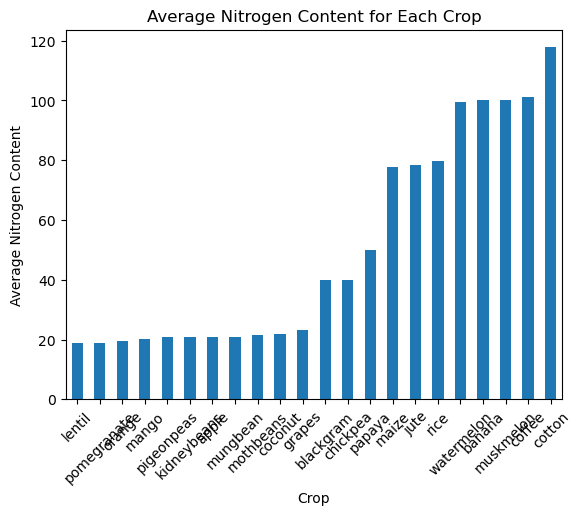

In [46]:
df.groupby(["label"])["N"].mean().sort_values(ascending=True).plot(kind="bar")
plt.title("Average Nitrogen Content for Each Crop")
plt.xlabel("Crop")
plt.ylabel("Average Nitrogen Content")
plt.xticks(rotation=45)
plt.show()

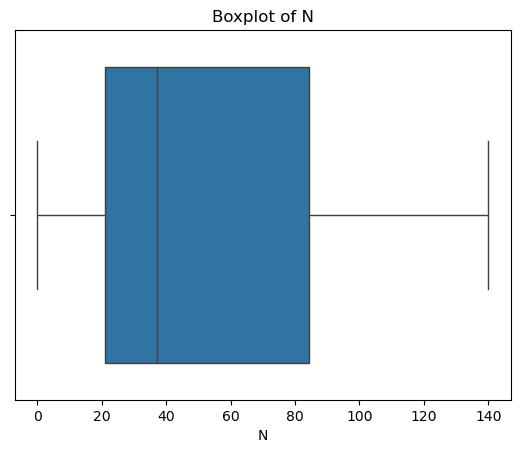

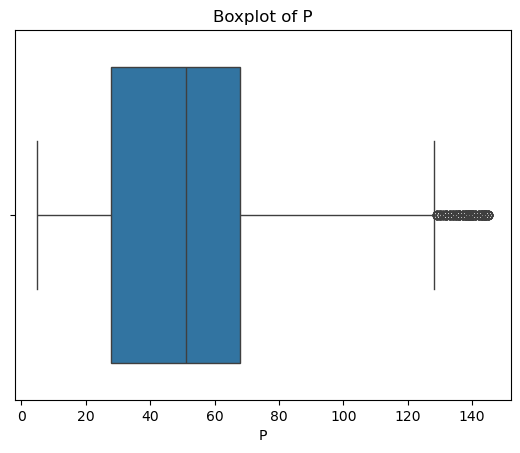

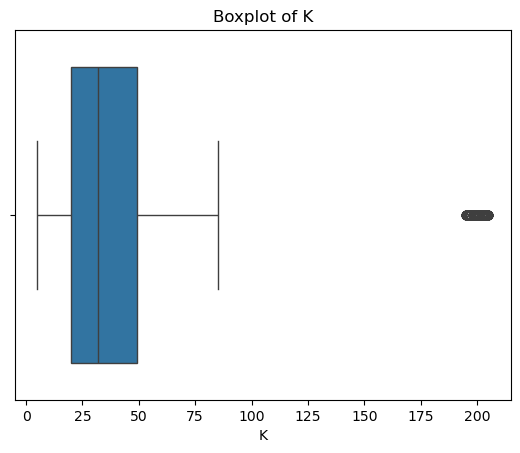

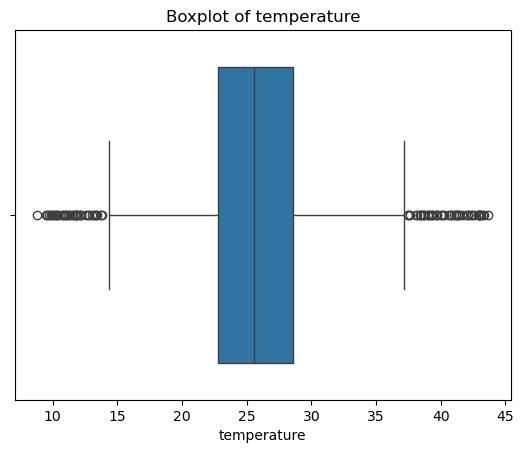

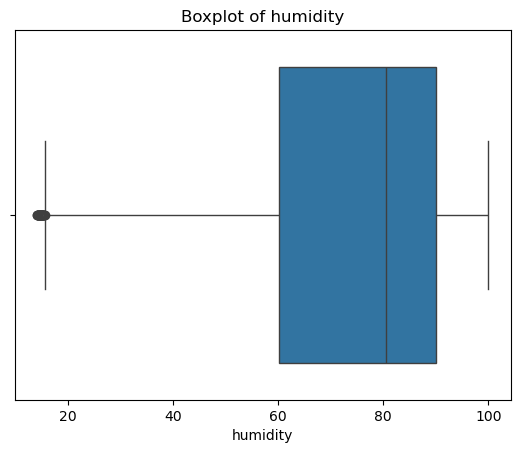

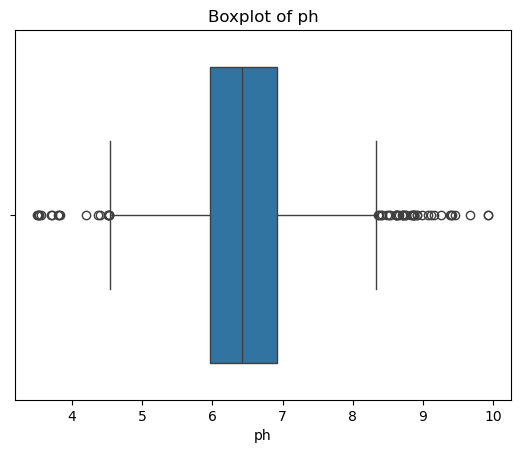

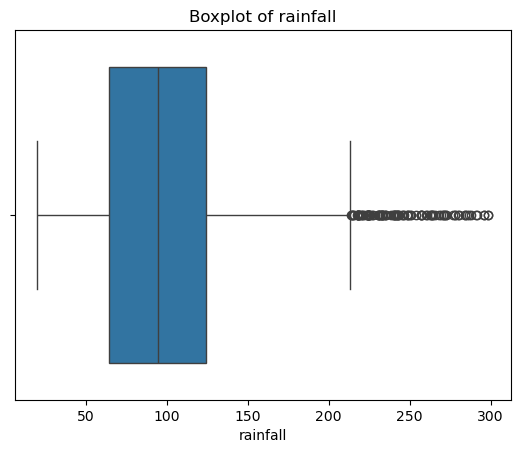

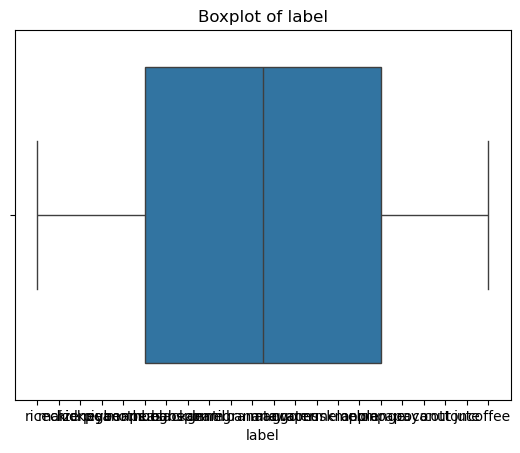

In [47]:
cols = [df.drop(columns= 'label')]

for cols in df.columns:
    sns.boxplot(x=cols, data=df)
    plt.title(f"Boxplot of {cols}")
    plt.show()  

In [48]:
for col in df.select_dtypes(include= np.number).columns:
    q2 = np.percentile(df[col], 25, interpolation ='midpoint')
    q3 = np.percentile(df[col], 75, interpolation ='midpoint')
    iqr = q3 - q2
    lower_bound = q2 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] < upper_bound) & (df[col]> lower_bound)]
df.shape 

(1835, 8)

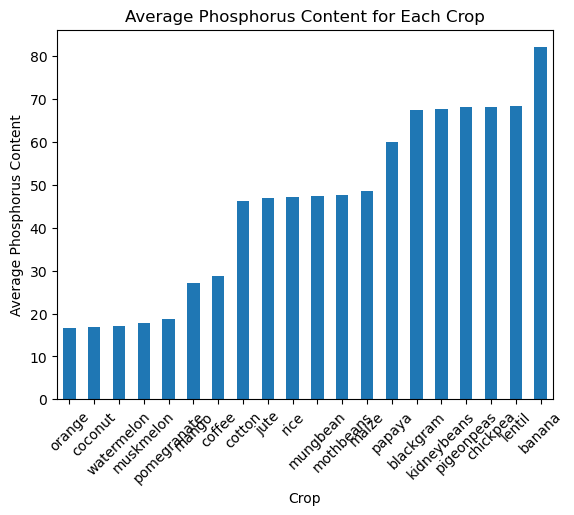

In [49]:
df.groupby(["label"])["P"].mean().sort_values(ascending=True).plot(kind="bar")
plt.title("Average Phosphorus Content for Each Crop")
plt.xlabel("Crop")
plt.ylabel("Average Phosphorus Content")
plt.xticks(rotation=45)
plt.show()

In [50]:
X = df.drop("label", axis=1)
y = df["label"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        28
   blackgram       1.00      1.00      1.00        17
    chickpea       1.00      1.00      1.00        14
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        22
        jute       1.00      0.95      0.97        20
 kidneybeans       1.00      1.00      1.00        23
      lentil       0.94      1.00      0.97        16
       maize       1.00      1.00      1.00        17
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      0.90      0.95        10
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        20
      papaya       1.00      1.00      1.00        13
  pigeonpeas       1.00      1.00      1.00        27
 pomegranate       1.00    

In [51]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
log_y_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_y_pred)
print(classification_report(y_test, log_y_pred))
print(confusion_matrix(y_test, log_y_pred))
print("Logistic Regression Accuracy:", log_accuracy)


              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        28
   blackgram       0.89      0.94      0.91        17
    chickpea       1.00      1.00      1.00        14
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        21
      cotton       1.00      0.95      0.98        22
        jute       0.95      0.95      0.95        20
 kidneybeans       0.96      1.00      0.98        23
      lentil       0.89      1.00      0.94        16
       maize       0.89      1.00      0.94        17
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      0.80      0.89        10
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        20
      papaya       1.00      0.92      0.96        13
  pigeonpeas       1.00      0.89      0.94        27
 pomegranate       1.00    

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(classification_report(y_test, dt_y_pred))
print(confusion_matrix(y_test, dt_y_pred))
print("Decision Tree Accuracy:", dt_accuracy)

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        28
   blackgram       1.00      1.00      1.00        17
    chickpea       1.00      1.00      1.00        14
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        22
        jute       0.95      0.95      0.95        20
 kidneybeans       1.00      1.00      1.00        23
      lentil       1.00      1.00      1.00        16
       maize       1.00      1.00      1.00        17
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      1.00      1.00        10
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        20
      papaya       1.00      0.85      0.92        13
  pigeonpeas       1.00      1.00      1.00        27
 pomegranate       1.00    

In [54]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(classification_report(y_test, xgb_y_pred))
print(confusion_matrix(y_test, xgb_y_pred))
print("XGBoost Accuracy:", xgb_accuracy)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19], got ['banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton' 'jute'
 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans' 'mungbean' 'muskmelon'
 'orange' 'papaya' 'pigeonpeas' 'pomegranate' 'rice' 'watermelon']